# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import passengers.csv and set it as a time-series object. Plot the TS
df = pd.read_csv('passengers.csv')

## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [6]:
def Dickey_fuller(data):
    '''print df when a timeseries target is passed data should be
    df[y_val]'''
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(data, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


In [7]:
df.Month = pd.to_datetime(df.Month)
df.set_index('Month', inplace=True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
from statsmodels.tsa.stattools import adfuller 

In [9]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab
Dickey_fuller(df['#Passengers'])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


Use your newly created function on the airpassenger data set.

## Perform a log() and sqrt() transform

In [10]:
# Log transform timeseries and compare with original to check the effect
df_log = np.log(df)
df_sqrt = np.sqrt(df)

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

In [11]:
# your code here
log_rolling_mean = df_log.rolling(7).mean()

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [12]:
# Subtract the moving average from the original data and 
# check head for Nans
df_min_roll = df_log - log_rolling_mean

In [13]:
df_min_roll.isna().sum()

#Passengers    6
dtype: int64

In [14]:
# Drop the NaN values from timeseries calculated above
df_min_roll.dropna(inplace=True)

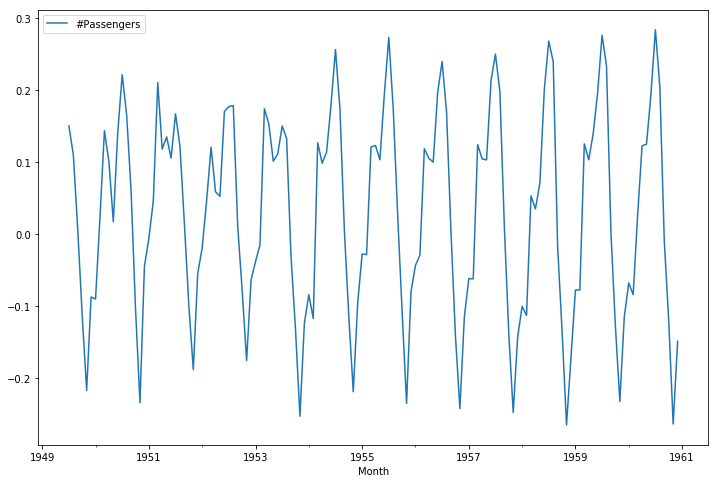

In [15]:
# Plot the result
df_min_roll.plot(figsize=(12,8))

Finally, use your function `check_stationarity` to see if this series is considered stationary!

In [16]:
# Your code here
Dickey_fuller(df_min_roll['#Passengers'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.348027
p-value                          0.156946
#Lags Used                      14.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


* better but not yet good enough

## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

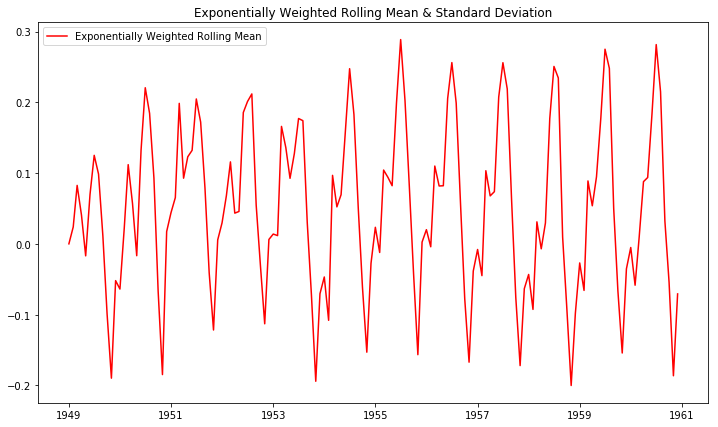

In [23]:
exp_rolmean = df_log.ewm(halflife = 4).mean()
new_min = df_log - exp_rolmean
# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
# orig = plt.plot(df_log, color='blue',label='Original')
mean = plt.plot(new_min, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

In [24]:
# do a stationarity check
Dickey_fuller(new_min["#Passengers"])

Results of Dickey-Fuller Test:
Test Statistic                  -3.297250
p-value                          0.015002
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


* good p-value for 5%, T-statistic is smaller than critical values for 5% and 10%

## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [30]:
# difference your data and look at the head
df_season = new_min.diff(periods=12)

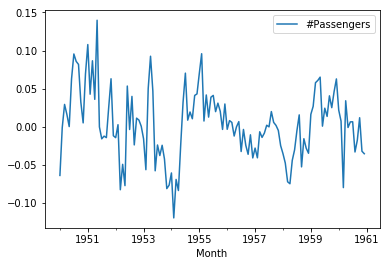

In [31]:
# plot your differenced time series
df_season.plot()

In [32]:
# drop nas
df_season.dropna(inplace=True)

In [33]:
# perform the stationarity check
Dickey_fuller(df_season["#Passengers"])

Results of Dickey-Fuller Test:
Test Statistic                  -3.601666
p-value                          0.005729
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


### Your conclusion

* Much better p-value and the Test Statistic is smaller than all critical values.

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.